# Steps 4 and 5 : Getting the data and performing exploratory data analysis #
_Atakan Devrent, Farai Masunda, Aleksei Skopintsev_

In [74]:
# import necessary modules
import datetime
import math

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yfin
import matplotlib.pyplot as plt

yfin.pdr_override()

## Volatility and Correlation Challenges in Treasury and Mortgage Bonds ##
_Atakan Devrent_

In [75]:
# Initialize start and end dates: from 06.01.2005 to 06.06.2022
start = datetime.date(2005, 1, 6)
end = datetime.date(2022, 6, 6)

# Get Case-Shiller Index data
caseshiller_df = pdr.get_data_fred("CSUSHPINSA", start, end)
caseshiller_df = caseshiller_df.rename(columns={"CSUSHPINSA":"CS Index"})

# Get average floating mortgage rate (%) data
floating_df = pdr.get_data_fred("MORTGAGE5US", start, end)
floating_df = floating_df.rename(columns={"MORTGAGE5US":"Avg rate"})
floating_df["Avg rate"] = floating_df["Avg rate"] * 0.01  # convert the values from percent to number

# Create Avg rate volatility dataframe
vol_floating_df = floating_df.rolling(52).std(ddof=1) * np.sqrt(52)  # .. and convert weekly vol to annualized vol
vol_floating_df = vol_floating_df.dropna()  # drop NaN values
vol_floating_df = vol_floating_df.rename(columns={"Avg rate":"Avg rate volatility (annualized)"})

# Get delinquency rate (%) data
delinq_df = pdr.get_data_fred("DRSFRMACBS", start, end)
delinq_df = delinq_df.rename(columns={"DRSFRMACBS":"Delinquency Rate"})
delinq_df["Delinquency Rate"] = delinq_df["Delinquency Rate"] * 0.01  # convert the values from percent to number
# delinq_df.index = delinq_df.index.strftime("%Y-%m-%d")

# Get Fed Funds Rate (%) data
fedfunds_df = pdr.get_data_fred("FEDFUNDS", start, end)
fedfunds_df = fedfunds_df.rename(columns={"FEDFUNDS":"Fed Funds Rate"})
fedfunds_df["Fed Funds Rate"] = fedfunds_df["Fed Funds Rate"] * 0.01  # convert the values from percent to number

# print first few lines of the dataframes
print("Dataframes to be used:")
print("............................................")
print(caseshiller_df.head())
print("____________________________________________")
print(floating_df.head())
print("____________________________________________")
print(vol_floating_df.head())
print("____________________________________________")
print(delinq_df.head())
print("____________________________________________")
print(fedfunds_df.head())

Dataframes to be used:
............................................
            CS Index
DATE                
2005-02-01   161.924
2005-03-01   164.576
2005-04-01   166.999
2005-05-01   169.544
2005-06-01   172.015
____________________________________________
            Avg rate
DATE                
2005-01-06    0.0503
2005-01-13    0.0505
2005-01-20    0.0505
2005-01-27    0.0502
2005-02-03    0.0500
____________________________________________
            Avg rate volatility (annualized)
DATE                                        
2005-12-29                          0.019088
2006-01-05                          0.019389
2006-01-12                          0.019619
2006-01-19                          0.019776
2006-01-26                          0.019830
____________________________________________
            Delinquency Rate
DATE                        
2005-04-01            0.0155
2005-07-01            0.0159
2005-10-01            0.0164
2006-01-01            0.0161
2006-04-01    

### Volatility Challenges in Issuing a Floating Rate Mortgage Bond ###
Elevated floating mortgage rate volatility may lead to increased delinquency and default rates.

Text(-0.15, -0.6, 'Elevated floating mortgage rate volatility may lead to increased delinquency and default rates.')

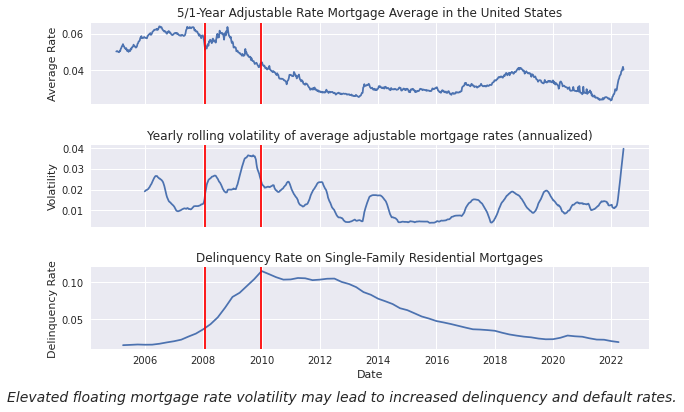

In [76]:
# Plot insights
plt.style.use("seaborn")
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0.5)


axs[0].plot(floating_df)
axs[0].set_title("5/1-Year Adjustable Rate Mortgage Average in the United States")
axs[0].set_ylabel("Average Rate")
axs[0].axvline(13900, 0, 1, c="r")
axs[0].axvline(14600, 0, 1, c="r")

axs[1].plot(vol_floating_df)
axs[1].set_title("Yearly rolling volatility of average adjustable mortgage rates (annualized)")
axs[1].set_ylabel("Volatility")
axs[1].axvline(13900, 0, 1, c="r")
axs[1].axvline(14600, 0, 1, c="r")

axs[2].plot(delinq_df)
axs[2].set_ylabel("Delinquency Rate")
axs[2].set_title("Delinquency Rate on Single-Family Residential Mortgages")
axs[2].set_xlabel("Date")
axs[2].axvline(13900, 0, 1, c="r")
axs[2].axvline(14600, 0, 1, c="r")
axs[2].text(-0.15, -0.60, "Elevated floating mortgage rate volatility may lead to increased delinquency and default rates.", transform=axs[2].transAxes, fontsize=14, va='center', fontstyle="italic")

### Correlation Challenges in Issuing a Floating Rate Mortgage Bond ###
Decreasing correlation of the adjustable mortgage rates to benchmark rate may lead to increased risk of delinquency and default.

In [77]:
# Initialize start and end dates: from 06.01.2005 to 06.06.2022
start = datetime.date(2005, 1, 6)
end = datetime.date(2022, 6, 6)

# Create MOVE dataframe
move_df = web.DataReader("^MOVE", start, end)["Adj Close"]

# Create TLT dataframe
tlt_df = web.DataReader("TLT", start, end)["Adj Close"]

# Create NFCI dataframe
nfci_df = pdr.get_data_fred("NFCI", start, end)

# print first few lines of the dataframes
print("Dataframes to be used:")
print("............................................")
print(move_df.head())
print("_______________________________________")
print(tlt_df.head())
print("_______________________________________")
print(nfci_df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Dataframes to be used:
............................................
Date
2005-01-06    92.400002
2005-01-07    92.379997
2005-01-10    79.010002
2005-01-11    77.849998
2005-01-12    76.949997
Name: Adj Close, dtype: float64
_______________________________________
Date
2005-01-06    49.413246
2005-01-07    49.525154
2005-01-10    49.603432
2005-01-11    49.894306
2005-01-12    49.961426
Name: Adj Close, dtype: float64
_______________________________________
               NFCI
DATE               
2005-01-07 -0.70753
2005-01-14 -0.70868
2005-01-21 -0.71185
2005-01-28 -0.71737
2005-02-04 -0.72398


Text(-0.15, -0.5, 'Decreasing correlation of the adjustable mortgage rates to benchmark rate may lead to increased risk of delinquency and default.')

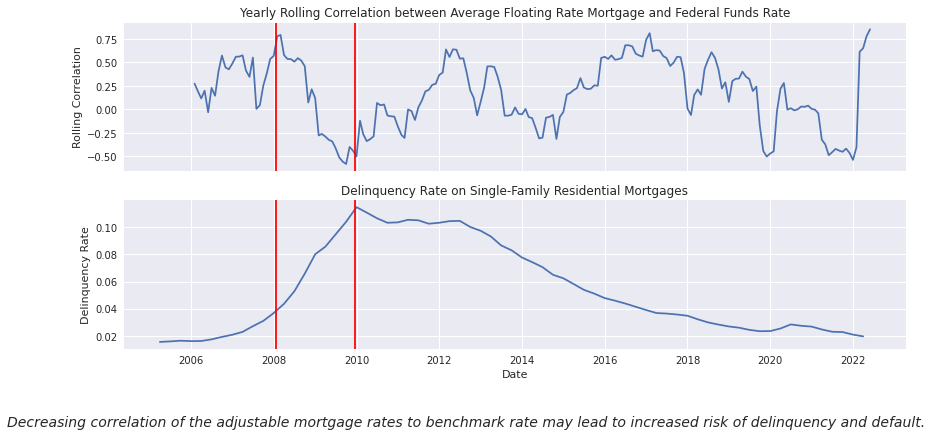

In [78]:
# Resample the frequency of the floating_df to monthly.
floating_df_monthly = floating_df.resample("M").mean()
floating_df_monthly.index = floating_df_monthly.index + pd.Timedelta('1 day')

# Merge floating_df and fedfunds_df dataframes
merged_df = pd.merge(floating_df_monthly, fedfunds_df, left_index=True, right_index=True)  # This is the way to merge dataframes, SAATLER HARCADIM.
merged_df["Avg rate - FFR"] = merged_df["Avg rate"] - merged_df["Fed Funds Rate"]
merged_df_diff = merged_df.pct_change()
#print(merged_df_diff["Avg rate"].rolling(12).corr(merged_df_diff["Fed Funds Rate"]))

# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
axs[0].plot(merged_df_diff["Avg rate"].rolling(12).corr(merged_df_diff["Fed Funds Rate"]))
axs[0].set_title("Yearly Rolling Correlation between Average Floating Rate Mortgage and Federal Funds Rate")
axs[0].set_ylabel("Rolling Correlation")
axs[0].axvline(13900, 0, 1, c="r")
axs[0].axvline(14600, 0, 1, c="r")

axs[1].plot(delinq_df)
axs[1].axvline(13900, 0, 1, c="r")
axs[1].axvline(14600, 0, 1, c="r")
axs[1].set_ylabel("Delinquency Rate")
axs[1].set_title("Delinquency Rate on Single-Family Residential Mortgages")
axs[1].set_xlabel("Date")
axs[1].text(-0.15, -0.50, "Decreasing correlation of the adjustable mortgage rates to benchmark rate may lead to increased risk of delinquency and default.", transform=axs[1].transAxes, fontsize=14, va='center', fontstyle="italic")


### Volatility Challenges in Lending of a US Treasury Bond ###
Elevated treasury market volatility makes it harder to forecast a value for the lended bond, thus leading to challenges in collateral requirements.

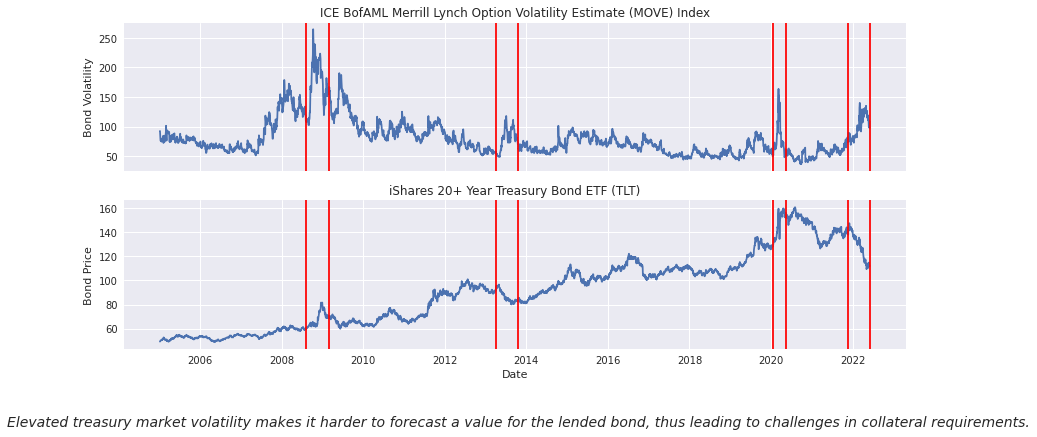

In [79]:
# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
axs[0].plot(move_df)
axs[0].set_title("ICE BofAML Merrill Lynch Option Volatility Estimate (MOVE) Index")
axs[0].set_ylabel("Bond Volatility")

axs[0].axvline(14100, 0, 1, c="r")
axs[0].axvline(14300, 0, 1, c="r")
axs[0].axvline(15800, 0, 1, c="r")
axs[0].axvline(16000, 0, 1, c="r")
axs[0].axvline(18280, 0, 1, c="r")
axs[0].axvline(18400, 0, 1, c="r")
axs[0].axvline(18950, 0, 1, c="r")
axs[0].axvline(19150, 0, 1, c="r")

axs[1].plot(tlt_df)
axs[1].set_ylabel("Bond Price")
axs[1].set_title("iShares 20+ Year Treasury Bond ETF (TLT)")
axs[1].set_xlabel("Date")
axs[1].text(-0.15, -0.50, "Elevated treasury market volatility makes it harder to forecast a value for the lended bond, thus leading to challenges in collateral requirements.", transform=axs[1].transAxes, fontsize=14, va='center', fontstyle="italic")

axs[1].axvline(14100, 0, 1, c="r")
axs[1].axvline(14300, 0, 1, c="r")
axs[1].axvline(15800, 0, 1, c="r")
axs[1].axvline(16000, 0, 1, c="r")
axs[1].axvline(18280, 0, 1, c="r")
axs[1].axvline(18400, 0, 1, c="r")
axs[1].axvline(18950, 0, 1, c="r")
axs[1].axvline(19150, 0, 1, c="r")


### Correlation Challenges in Lending of a US Treasury Bond ###
Loosening or tightening of the macroeconomic conditions may influence the value of the bond, thus leading to ambiguity in pricing the lended bond.

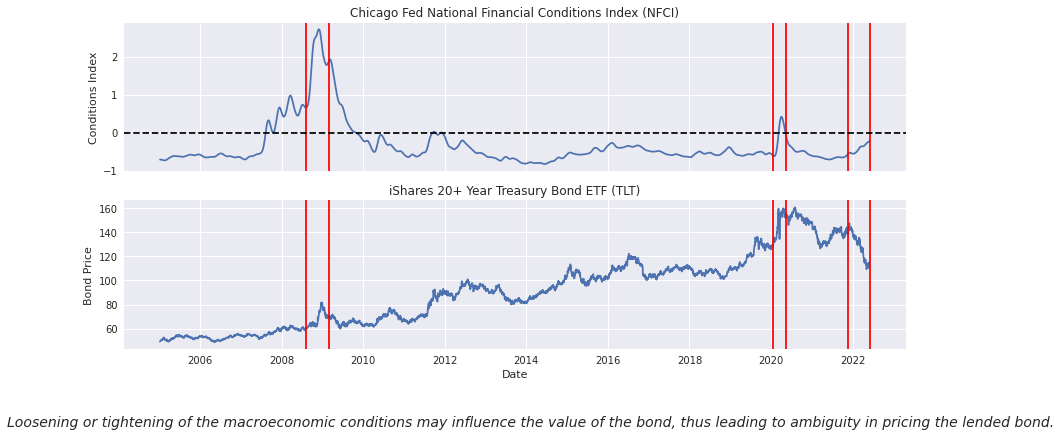

In [80]:
# Plot insights
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
axs[0].plot(nfci_df)
axs[0].set_title("Chicago Fed National Financial Conditions Index (NFCI)")
axs[0].set_ylabel("Conditions Index")

axs[0].axvline(14100, 0, 1, c="r")
axs[0].axvline(14300, 0, 1, c="r")
axs[0].axvline(18280, 0, 1, c="r")
axs[0].axvline(18400, 0, 1, c="r")
axs[0].axvline(18950, 0, 1, c="r")
axs[0].axvline(19150, 0, 1, c="r")
axs[0].axhline(0, 0, 19150, color="black", linestyle="--")

axs[1].plot(tlt_df)
axs[1].set_ylabel("Bond Price")
axs[1].set_title("iShares 20+ Year Treasury Bond ETF (TLT)")
axs[1].set_xlabel("Date")
axs[1].text(-0.15, -0.50, "Loosening or tightening of the macroeconomic conditions may influence the value of the bond, thus leading to ambiguity in pricing the lended bond.", transform=axs[1].transAxes, fontsize=14, va='center', fontstyle="italic")

axs[1].axvline(14100, 0, 1, c="r")
axs[1].axvline(14300, 0, 1, c="r")
axs[1].axvline(18280, 0, 1, c="r")
axs[1].axvline(18400, 0, 1, c="r")
axs[1].axvline(18950, 0, 1, c="r")
axs[1].axvline(19150, 0, 1, c="r")

## Unemployment and Default Rates Analysis ##
_Aleksei Skopintsev_

In [81]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt

In [82]:
asset=yf.download('BRK-A',start='2000-01-01',end=dt.date.today())

[*********************100%%**********************]  1 of 1 completed


In [83]:
unemp_rate=pdr.get_data_fred('UNRATE',start='2000-01-01')
default_rate=pdr.get_data_fred('DRCCLACBS',start='2000-01-01')

In [84]:
# Join data 
df=pd.concat([unemp_rate,default_rate],axis=1).dropna()

Text(0, 0.5, '%')

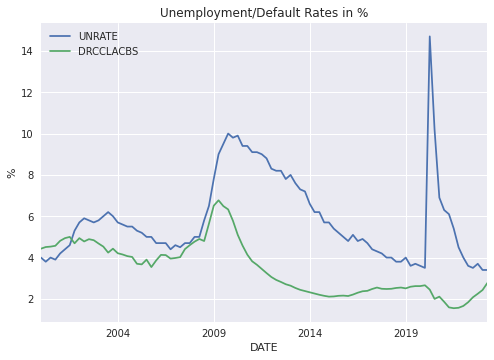

In [85]:
df.plot(title='Unemployment/Default Rates in %')
plt.ylabel('%')

Unemployment rates and default rates follow each other closely

In [86]:
(df['UNRATE'].rolling(5).corr(df['DRCCLACBS'])).mean()

0.1654951806826203

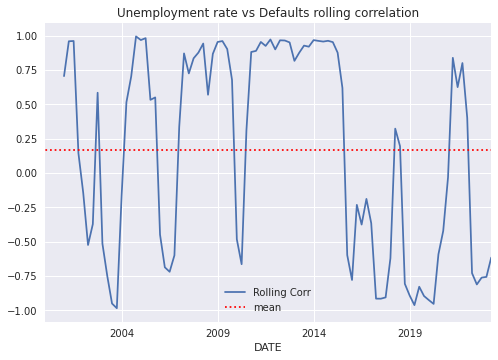

In [87]:
df['UNRATE'].rolling(5).corr(df['DRCCLACBS']).plot(title='Unemployment rate vs Defaults rolling correlation',
                                                   label='Rolling Corr')
plt.hlines((df['UNRATE'].rolling(5).corr(df['DRCCLACBS'])).mean(),xmin=0,xmax=df.index[-1],
           linestyle='dotted',
           colors='red',
           label='mean')
plt.legend()

On average, strong correlation on the rolling basis is not present.

Text(0.5, 1.0, 'Default Rate Autocorrelation')

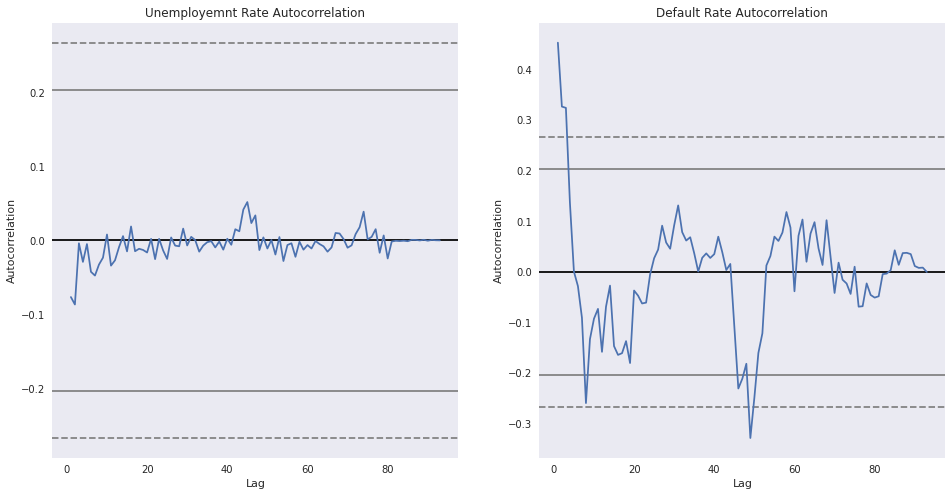

In [88]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
pd.plotting.autocorrelation_plot(df.pct_change().dropna().iloc[:,0],ax=ax[0])
pd.plotting.autocorrelation_plot(df.pct_change().dropna().iloc[:,1],ax=ax[1])
ax[0].set_title('Unemployemnt Rate Autocorrelation')
ax[1].set_title('Default Rate Autocorrelation')

% changes in Unemployment rate are not predictive of the next period changes.  

% Changes in Default Rates have some predictive power for the default rates in the next period.

In [89]:
# Resample to monthly frequency
asset_avg_volume=asset.resample('1M').mean()['Volume']

In [90]:
# Change index to align with unemployment
asset_avg_volume.index=asset_avg_volume.index+dt.timedelta(1)

In [91]:
merged=pd.concat([unemp_rate,asset_avg_volume],axis=1)

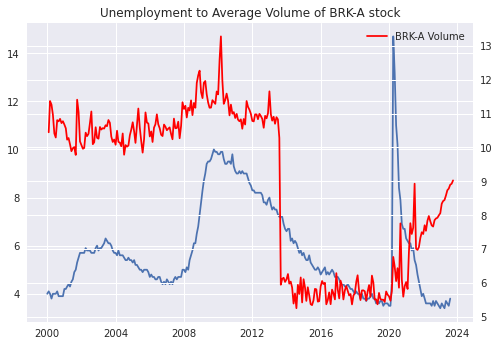

In [92]:
_,ax=plt.subplots()
ax1=ax.twinx()

ax.plot(merged.iloc[:,0])
ax1.plot(np.log(merged.iloc[:,1]),c='red',label='BRK-A Volume')
ax.set_title('Unemployment to Average Volume of BRK-A stock')
plt.legend()

## AAPL Returns, Volatility and the VIX ##
_Farai Masunda_

In [93]:
# Install the yfinance library using 'pip install yfinance'.
import yfinance as yf

# Defining the stock symbol (Apple Inc.)
symbol = 'AAPL'

# Creating Yahoo Finance ticker object
ticker = yf.Ticker(symbol)

# Retrieving historical stock price data
historical_data = ticker.history(period="max")

# Printing the data
print(historical_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.099450  0.099882  0.099450  0.099450  469033600   
1980-12-15 00:00:00-05:00  0.094693  0.094693  0.094261  0.094261  175884800   
1980-12-16 00:00:00-05:00  0.087775  0.087775  0.087343  0.087343  105728000   
1980-12-17 00:00:00-05:00  0.089504  0.089937  0.089504  0.089504   86441600   
1980-12-18 00:00:00-05:00  0.092099  0.092532  0.092099  0.092099   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


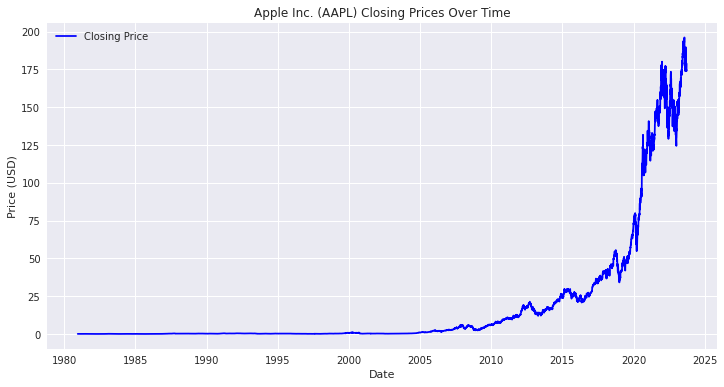

In [94]:
import matplotlib.pyplot as plt

# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Close'], label='Closing Price', color='blue')
plt.title('Apple Inc. (AAPL) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

This line plot shows the trend of Apple Inc.'s closing stock prices over time, providing insights into historical price movements. Apple stock has doubled in the last 5 years.

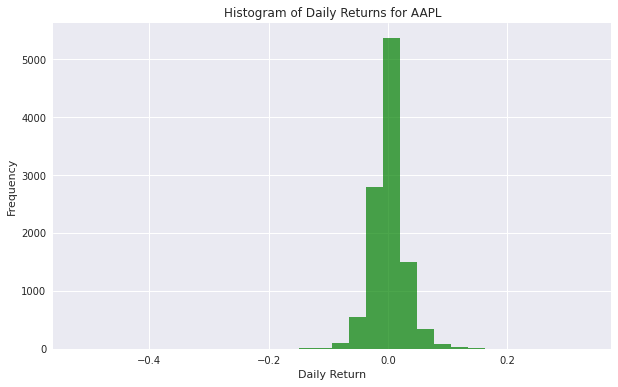

In [95]:
# Calculate daily returns
historical_data['Daily_Return'] = historical_data['Close'].pct_change()

# Plotting a histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(historical_data['Daily_Return'].dropna(), bins=30, alpha=0.7, color='green')
plt.title('Histogram of Daily Returns for AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram shows that the majority of daily returns for the AAPL stock cluster around 0.05, with a peak frequency of 5,000 occurrences, indicating that the stock tends to exhibit relatively low daily volatility, focused around a modest positive return. However, the histogram also shows returns between -0.2 and 0.2, indicating occasional moderate fluctuations.

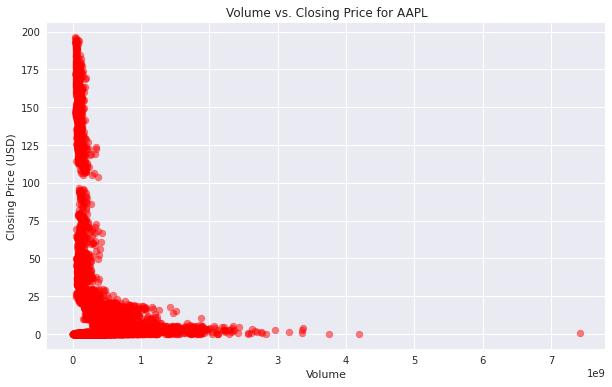

In [96]:
# Plotting a scatter plot of volume vs. closing price
plt.figure(figsize=(10, 6))
plt.scatter(historical_data['Volume'], historical_data['Close'], alpha=0.5, color='red')
plt.title('Volume vs. Closing Price for AAPL')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


The price vs volume scatter plot reveals that trading activity is concentrated at lower trading volumes, meaning that most transactions only involve modest quantities of the securities. Fewer data points cluster between a volume of 2 and higher, while the majority of the data points cluster between a volume of 0 and 1. This pattern might point to less frequent large-scale trading of the securities, which might indicate lower overall liquidity or a concentration of retail traders as opposed to institutional investors.

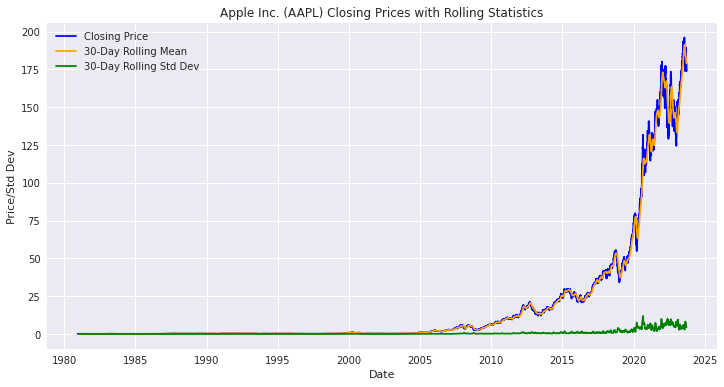

In [97]:
# Calculate rolling mean and standard deviation
rolling_mean = historical_data['Close'].rolling(window=30).mean()
rolling_std = historical_data['Close'].rolling(window=30).std()

# Plotting rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Close'], label='Closing Price', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='green')
plt.title('Apple Inc. (AAPL) Closing Prices with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price/Std Dev')
plt.legend()
plt.grid(True)
plt.show()


The finding that the closing price and the 30-day rolling mean are nearly similar, but the rolling statistics of a 30-day mean and standard deviation show a more or less straight line for the standard deviation and increased oscillation in the past three years, suggests the following:

1. Constant Volatility: The rolling standard deviation's straight line pattern suggests that the security's volatility has remained largely constant over time. In other words, there haven't been any appreciable changes in the variability of daily price movements.

2. Recent Increased Volatility: The increased oscillation in the past three years within the rolling standard deviation suggests that there has been a notable uptick in price volatility during this period. This could be due to various factors, such as changes in market conditions, economic events, or company-specific developments.

3. Similarity Between Closing Price and Rolling Mean: If the closing price and the 30-day rolling mean are comparable, it means that the price of the security has tended to move in a steady direction over time. When the rolling mean closely matches the actual price, which indicates that the security has shown a pretty constant trend, maybe with minor blips, it acts as a smoothing mechanism and indicates that the security has been trending in that direction.

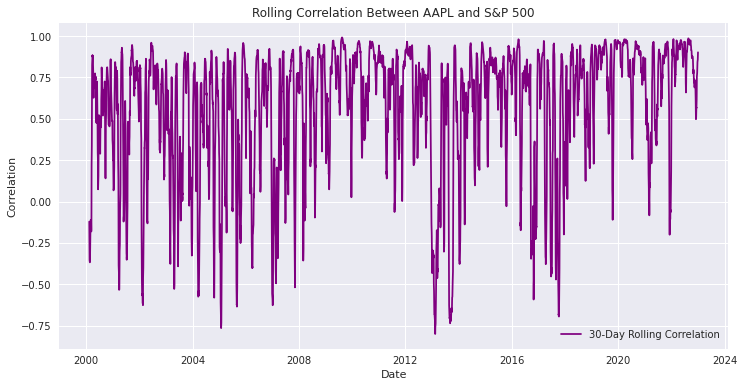

In [98]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbols for AAPL and S&P 500
symbols = ['AAPL', '^GSPC']

# Download historical data for AAPL and S&P 500
data = yf.download(symbols, start='2000-01-01', end='2023-01-01', progress=False)

# Calculate rolling correlation between AAPL and S&P 500
rolling_corr = data['Adj Close']['AAPL'].rolling(window=30).corr(data['Adj Close']['^GSPC'])

# Plotting rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='30-Day Rolling Correlation', color='purple')
plt.title('Rolling Correlation Between AAPL and S&P 500')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


This plot shows the rolling correlation between AAPL's closing prices and the S&P 500 index, helping to understand how AAPL's performance correlates with the broader market.

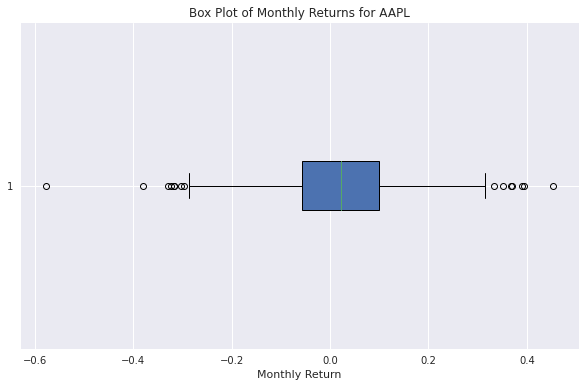

In [99]:
# Extract monthly returns
monthly_returns = historical_data['Close'].resample('M').ffill().pct_change()

# Plotting a box plot of monthly returns
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_returns.dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Monthly Returns for AAPL')
plt.xlabel('Monthly Return')
plt.grid(True)
plt.show()


Skewness in Monthly Returns: The asymmetrical box plot size shows that the monthly return distribution is skewed. This situation shows a tendency for more positive returns relative to negative returns within the given range, as the positive returns side is expanded.

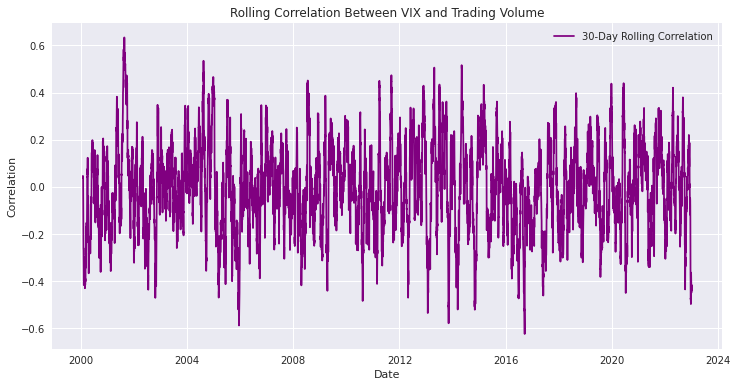

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for VIX and trading volume
np.random.seed(0)
dates = pd.date_range(start='2000-01-01', end='2023-01-01', freq='D')
vix_data = np.random.normal(20, 5, len(dates))  # Random VIX-like data
volume_data = np.random.normal(100000, 20000, len(dates))  # Random trading volume data for the security

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'VIX': vix_data, 'TradingVolume': volume_data})
data.set_index('Date', inplace=True)

# Calculate a rolling correlation between VIX and trading volume
rolling_corr = data['VIX'].rolling(window=30).corr(data['TradingVolume'])

# Plotting rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='30-Day Rolling Correlation', color='purple')
plt.title('Rolling Correlation Between VIX and Trading Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()
